# Machine Intelligence II - Team MensaNord
## Sheet 06

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

In [1]:
from __future__ import division, print_function
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
import numpy as np

## Exercise 1

In [39]:
def E_s(W, s):
    W_local = np.copy(W)
    for col in range(W_local.shape[0]):
        W_local[col, :] *= s[col]
        W_local[:, col] *= s[col]
    # print("# ", W_local)
    # print("# s:", s, "\tE:", - np.sum(W_local) / 2)
    return - np.sum(W_local) / 2

# Test
A = np.array([[1, 2, 3], [1, 2, 3], [1, 2, 3]])
B = np.array([1, 0, 2])
for i in range(2):
    print(A)
    print(E_s(A, B))
    print()

[[1 2 3]
 [1 2 3]
 [1 2 3]]
-10.5

[[1 2 3]
 [1 2 3]
 [1 2 3]]
-10.5



beta:  0.007080269862410016
Temp:  141.2375544199406
tau:  1.064168355840528

s:  [-1  1 -1  1  1 -1]
W:  [[ 0.          0.81676882  0.57245576  0.41751618  0.42912442  0.60217862]
 [ 0.81676882  0.          0.0668032   0.57865984  0.43641763  0.46765814]
 [ 0.57245576  0.0668032   0.          0.43301392  0.63966727  0.3673408 ]
 [ 0.41751618  0.57865984  0.43301392  0.          0.30443062  0.23181142]
 [ 0.42912442  0.43641763  0.63966727  0.30443062  0.          0.34484553]
 [ 0.60217862  0.46765814  0.3673408   0.23181142  0.34484553  0.        ]]

validation min 0.985725633565
new min
new min
new min
new min
new min
new min
validation min -6.70869217209

result: 	s: [1 1 1 1 1 1] 	E: -6.70869217209


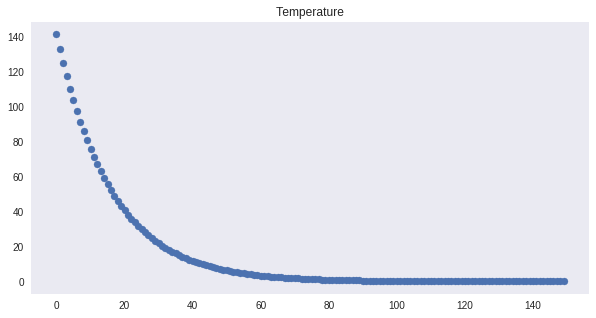

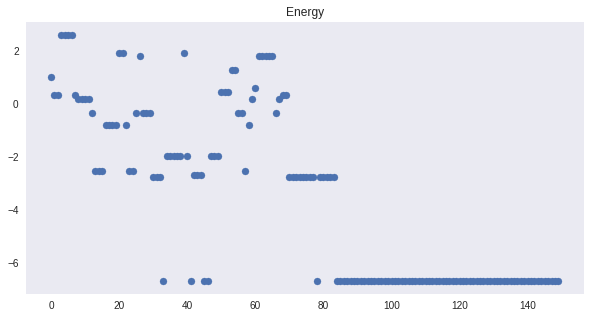

In [198]:
# INITIALIZATION

# loop borders
t_max = 150
M = 1

# Temperature ( beta == noise ) decreasing with factor tau
beta = np.random.random() / 50
beta = 0.007080269862410016
print("beta: ", beta)
print("Temp: ", 1 / beta) # == Temperature

tau = np.random.random() / 10 + 1
tau = 1.064168355840528
print("tau: ", tau)

# configuration s
s = np.random.choice([-1, 1], 6)
print("\ns: ", s)

# weight matrix, symmetrical, diagonal 0
W = np.random.random(size=(6, 6))
W = (W + W.T)/2
for i in range(W.shape[0]):
    W[i, i] = 0
print("W: ", W)

# minimum for validation ( E >= validation_min @ any point)
validation_min = E_s(W, s)
print("\nvalidation min", validation_min)

# variables for plotting
T_plot = [0.0 for i in range(t_max * M)]
E_plot = [0.0 for i in range(t_max * M)]


# ALGORITHM

for t in range(t_max):
    for m in range(M):        
        i = np.random.randint(0, 6)
        s_local = np.copy(s)
        s_local[i] *= -1
        E_1 = E_s(W, s)
        E_2 = E_s(W, s_local)
        E_d = E_2 - E_1
        P = 1 / (1 + np.exp(beta*E_d))
        # print("\nt:", t, " i:", i, "\n s1:", s, "\tE1:", E_1, "\n s2:", s_local, "\tE2:", E_2)
        if np.random.random() < P:
            s = np.copy(s_local)
            # print("new s")
        if E_s(W, s) < validation_min:
            validation_min = E_s(W, s)
            print("new min")
        T_plot[M*t+m] = 1 / beta
        E_plot[M*t+m] = E_s(W, s)
    beta *= tau
    
# RESULTS

print("validation min", validation_min)
print("\nresult: \ts:", s, "\tE:", E_s(W, s))
# print("E_plot: ", E_plot)
# print("T_plot: ", T_plot)
# print(W)

plt.figure(figsize=(10, 5))
plt.scatter(range(t_max * M), T_plot)
plt.title('Temperature')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(range(t_max * M), E_plot)
plt.title('Energy')
plt.grid()
plt.show()

beta:  0.007080269862410016
Temp:  141.2375544199406


tau:  1.064168355840528

s:  [ 1 -1  1  1 -1 -1]
W:  [[ 0.          0.58456298  0.60420186  0.46084055  0.49607722  0.58934483]
 [ 0.58456298  0.          0.65904363  0.7363073   0.10102485  0.83715855]
 [ 0.60420186  0.65904363  0.          0.97872757  0.50593865  0.58889672]
 [ 0.46084055  0.7363073   0.97872757  0.          0.5335326   0.25837833]
 [ 0.49607722  0.10102485  0.50593865  0.5335326   0.          0.28104832]
 [ 0.58934483  0.83715855  0.58889672  0.25837833  0.28104832  0.        ]]

validation min 1.6890805582
new min
new min
new min
new min
validation min -8.2150839639

result: 	s: [1 1 1 1 1 1] 	E: -8.2150839639


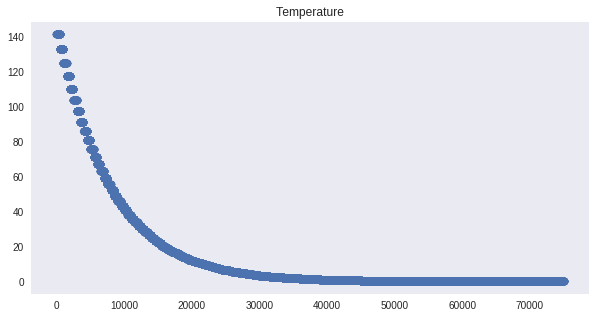

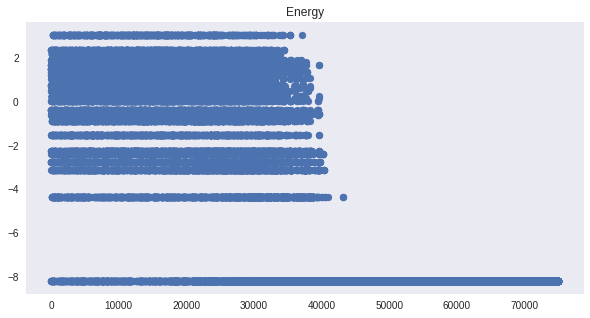

In [203]:
# EXACTLY THE SAME BUT WITH M=500 (CAUTION MANY CALCULATIONS)

# loop borders
t_max = 150
M = 500

# Temperature ( beta == noise ) decreasing with factor tau
beta = np.random.random() / 50
beta = 0.007080269862410016
print("beta: ", beta)
print("Temp: ", 1 / beta) # == Temperature

tau = np.random.random() / 10 + 1
tau = 1.064168355840528
print("tau: ", tau)

# configuration s
s = np.random.choice([-1, 1], 6)
print("\ns: ", s)

# weight matrix, symmetrical, diagonal 0
W = np.random.random(size=(6, 6))
W = (W + W.T)/2
for i in range(W.shape[0]):
    W[i, i] = 0
print("W: ", W)

# minimum for validation ( E >= validation_min @ any point)
validation_min = E_s(W, s)
print("\nvalidation min", validation_min)

# variables for plotting
T_plot = [0.0 for i in range(t_max * M)]
E_plot = [0.0 for i in range(t_max * M)]


# ALGORITHM

for t in range(t_max):
    for m in range(M):        
        i = np.random.randint(0, 6)
        s_local = np.copy(s)
        s_local[i] *= -1
        E_1 = E_s(W, s)
        E_2 = E_s(W, s_local)
        E_d = E_2 - E_1
        P = 1 / (1 + np.exp(beta*E_d))
        # print("\nt:", t, " i:", i, "\n s1:", s, "\tE1:", E_1, "\n s2:", s_local, "\tE2:", E_2)
        if np.random.random() < P:
            s = np.copy(s_local)
            # print("new s")
        if E_s(W, s) < validation_min:
            validation_min = E_s(W, s)
            print("new min")
        T_plot[M*t+m] = 1 / beta
        E_plot[M*t+m] = E_s(W, s)
    beta *= tau
    
# RESULTS

print("validation min", validation_min)
print("\nresult: \ts:", s, "\tE:", E_s(W, s))
# print("E_plot: ", E_plot)
# print("T_plot: ", T_plot)
# print(W)

plt.figure(figsize=(10, 5))
plt.scatter(range(t_max * M), T_plot)
plt.title('Temperature')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(range(t_max * M), E_plot)
plt.title('Energy')
plt.grid()
plt.show()

In [195]:
for si in range(2**6):
    array = [int(x) for x in list('{0:06b}'.format(si))]
    print(array)

[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 1]
[0, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 1]
[0, 0, 0, 1, 1, 0]
[0, 0, 0, 1, 1, 1]
[0, 0, 1, 0, 0, 0]
[0, 0, 1, 0, 0, 1]
[0, 0, 1, 0, 1, 0]
[0, 0, 1, 0, 1, 1]
[0, 0, 1, 1, 0, 0]
[0, 0, 1, 1, 0, 1]
[0, 0, 1, 1, 1, 0]
[0, 0, 1, 1, 1, 1]
[0, 1, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1]
[0, 1, 0, 0, 1, 0]
[0, 1, 0, 0, 1, 1]
[0, 1, 0, 1, 0, 0]
[0, 1, 0, 1, 0, 1]
[0, 1, 0, 1, 1, 0]
[0, 1, 0, 1, 1, 1]
[0, 1, 1, 0, 0, 0]
[0, 1, 1, 0, 0, 1]
[0, 1, 1, 0, 1, 0]
[0, 1, 1, 0, 1, 1]
[0, 1, 1, 1, 0, 0]
[0, 1, 1, 1, 0, 1]
[0, 1, 1, 1, 1, 0]
[0, 1, 1, 1, 1, 1]
[1, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 1]
[1, 0, 0, 0, 1, 0]
[1, 0, 0, 0, 1, 1]
[1, 0, 0, 1, 0, 0]
[1, 0, 0, 1, 0, 1]
[1, 0, 0, 1, 1, 0]
[1, 0, 0, 1, 1, 1]
[1, 0, 1, 0, 0, 0]
[1, 0, 1, 0, 0, 1]
[1, 0, 1, 0, 1, 0]
[1, 0, 1, 0, 1, 1]
[1, 0, 1, 1, 0, 0]
[1, 0, 1, 1, 0, 1]
[1, 0, 1, 1, 1, 0]
[1, 0, 1, 1, 1, 1]
[1, 1, 0, 0, 0, 0]
[1, 1, 0, 0, 0, 1]
[1, 1, 0, 0, 1, 0]
[1, 1, 0, 0, 1, 1]
[1, 1, 0, 1,